In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("avocado_ripeness_dataset.csv")

In [21]:
# Show first rows
print(df.head(10))

   firmness  hue  saturation  brightness color_category  sound_db  weight_g  \
0      14.5   19          40          26          black        34       175   
1      71.7   53          69          75          green        69       206   
2      88.5   60          94          46     dark green        79       220   
3      93.8  105          87          41     dark green        75       299   
4      42.5  303          58          32         purple        63       200   
5      13.6    2          51          11          black        34       173   
6      52.3  277          75          57         purple        61       187   
7      88.1   91          93          48     dark green        73       281   
8      85.2  116          89          67     dark green        77       220   
9      67.3   77          79          78          green        66       232   

   size_cm3         ripeness  
0       261             ripe  
1       185  pre-conditioned  
2       143             hard  
3     

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   firmness        250 non-null    float64
 1   hue             250 non-null    int64  
 2   saturation      250 non-null    int64  
 3   brightness      250 non-null    int64  
 4   color_category  250 non-null    object 
 5   sound_db        250 non-null    int64  
 6   weight_g        250 non-null    int64  
 7   size_cm3        250 non-null    int64  
 8   ripeness        250 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 17.7+ KB
None


In [5]:
print(df.describe())

         firmness        hue  saturation  brightness    sound_db    weight_g  \
count  250.000000  250.00000  250.000000   250.00000  250.000000  250.000000   
mean    50.618400  125.94400   64.356000    45.07200   58.016000  220.188000   
std     27.277678  117.13767   17.377144    19.11629   13.838126   34.405225   
min     10.300000    1.00000   30.000000    10.00000   30.000000  152.000000   
25%     25.750000   25.25000   51.250000    31.00000   47.250000  193.250000   
50%     48.950000   77.00000   65.000000    46.00000   60.000000  220.000000   
75%     74.050000  278.75000   76.750000    58.00000   68.000000  245.000000   
max     98.800000  329.00000   99.000000    78.00000   79.000000  299.000000   

         size_cm3  
count  250.000000  
mean   208.644000  
std     55.940564  
min    100.000000  
25%    155.250000  
50%    218.000000  
75%    260.500000  
max    299.000000  


In [7]:
# Check missing values
print(df.isnull().sum())

firmness          0
hue               0
saturation        0
brightness        0
color_category    0
sound_db          0
weight_g          0
size_cm3          0
ripeness          0
dtype: int64


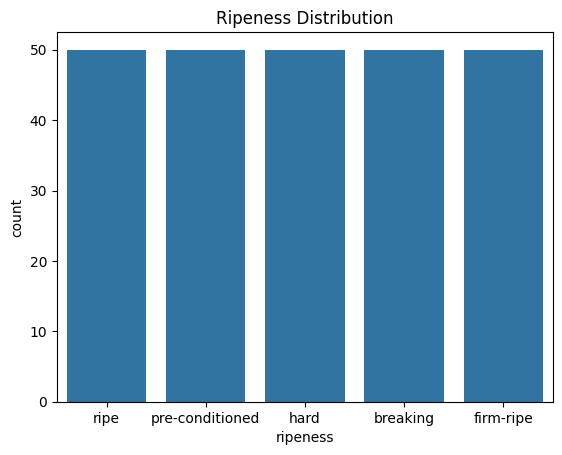

In [8]:
# Count plot of ripeness
sns.countplot(data=df, x='ripeness')
plt.title("Ripeness Distribution")
plt.show()


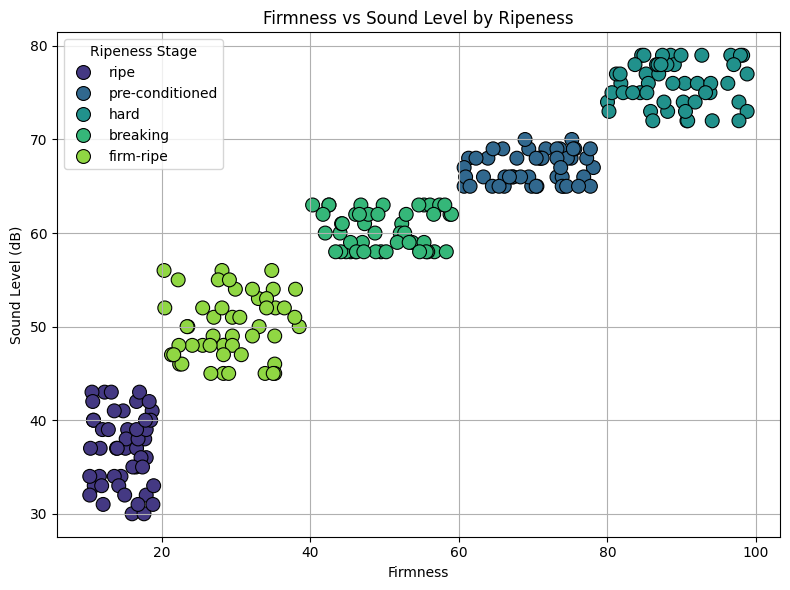

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='firmness',
    y='sound_db',
    hue='ripeness',
    palette='viridis',
    s=100,
    edgecolor='black'
)
plt.title("Firmness vs Sound Level by Ripeness")
plt.xlabel("Firmness")
plt.ylabel("Sound Level (dB)")
plt.legend(title='Ripeness Stage')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\rohan\AppData\Local\Temp\ipykernel_6944\656517324.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


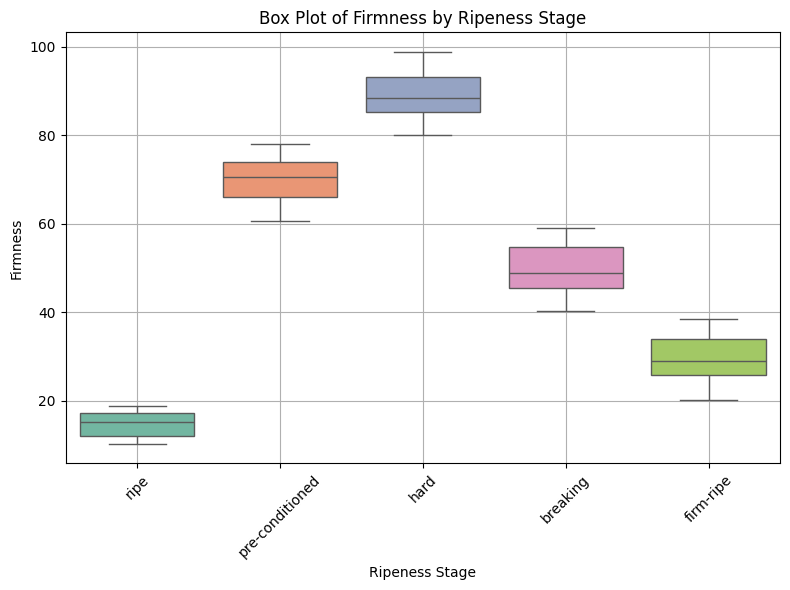

In [22]:
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x='ripeness',
    y='firmness',
    palette='Set2'
)
plt.title("Box Plot of Firmness by Ripeness Stage")
plt.xlabel("Ripeness Stage")
plt.ylabel("Firmness")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

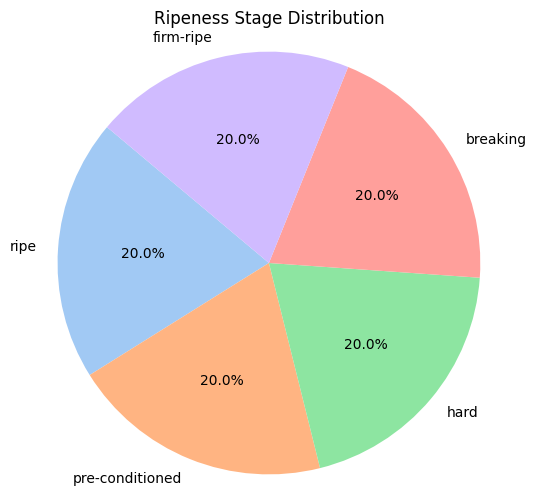

In [23]:
# Count values
ripeness_counts = df['ripeness'].value_counts()
# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(
    ripeness_counts,
    labels=ripeness_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')[0:len(ripeness_counts)]
)
plt.title("Ripeness Stage Distribution")
plt.axis('equal')  # Equal aspect ratio ensures a perfect circle
plt.show()

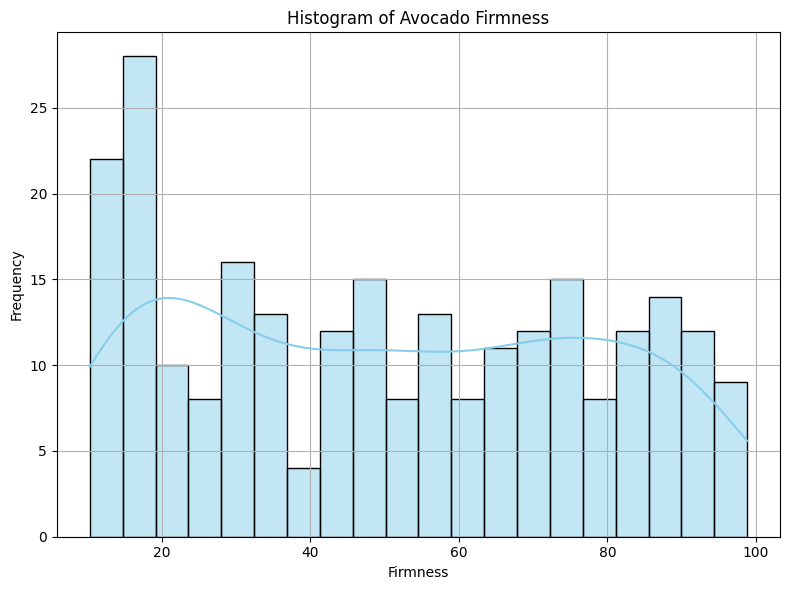

In [24]:
plt.figure(figsize=(8,6))
sns.histplot(
    data=df,
    x='firmness',
    bins=20,
    kde=True,
    color='skyblue',
    edgecolor='black'
)
plt.title("Histogram of Avocado Firmness")
plt.xlabel("Firmness")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

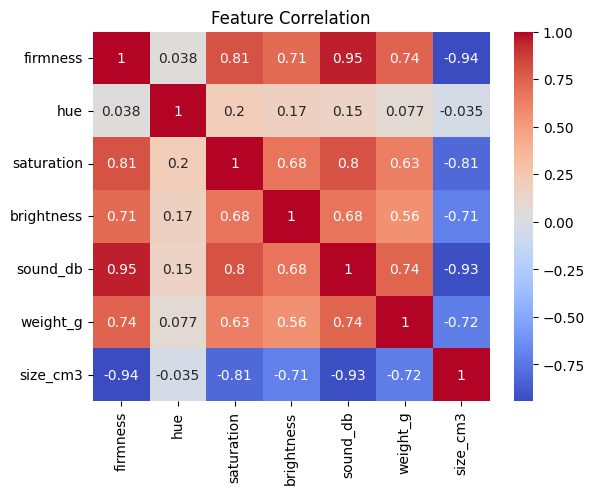

In [9]:
# Correlation heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [12]:
# Convert categorical to numeric if needed
df['ripeness'] = df['ripeness'].astype('category').cat.codes

In [13]:
X = df.drop('ripeness', axis=1)
y = df['ripeness']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
# Sample dataset
df = pd.read_csv('avocado_ripeness_dataset.csv')
# Split features and labels
X = df.drop('ripeness', axis=1)
y = df['ripeness']
# Convert categorical features
X = pd.get_dummies(X)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
# 1. One-hot encode
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
# 2. Align columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)
# 3. Fill missing values
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
# 4. Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)
# 5. Make predictions
y_pred = model.predict(X_test)
# 6. Evaluate
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
                 precision    recall  f1-score   support

       breaking       1.00      1.00      1.00        10
      firm-ripe       1.00      1.00      1.00        12
           hard       1.00      1.00      1.00        11
pre-conditioned       1.00      1.00      1.00         9
           ripe       1.00      1.00      1.00         8

       accuracy                           1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50

